# Breast Cancer Detection

Cancer occurs when changes called mutations take place in genes that regulate cell growth. The mutations let the cells divide and multiply in an uncontrolled way.

Breast cancer is cancer that develops in breast cells. Typically, the cancer forms in either the lobules or the ducts of the breast. Lobules are the glands that produce milk, and ducts are the pathways that bring the milk from the glands to the nipple. Cancer can also occur in the fatty tissue or the fibrous connective tissue within your breast.

## Usefull Libraries

In [7]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [8]:
#LOADING BREAST CANCER DATASET
cancer_data = load_breast_cancer()

In [9]:
#PRINTING DATASET
cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [10]:
#FIND KEYS OF DATASETS
cancer_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [11]:
cancer_data['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [12]:
#CREATING DATAFRAME
cancer_dataframe = pd.DataFrame(np.c_[cancer_data['data'],cancer_data['target']],\
                              columns = np.append(cancer_data['feature_names'], ['target']))

In [13]:
cancer_dataframe

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [14]:
cancer_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Our Data Set has no Null values

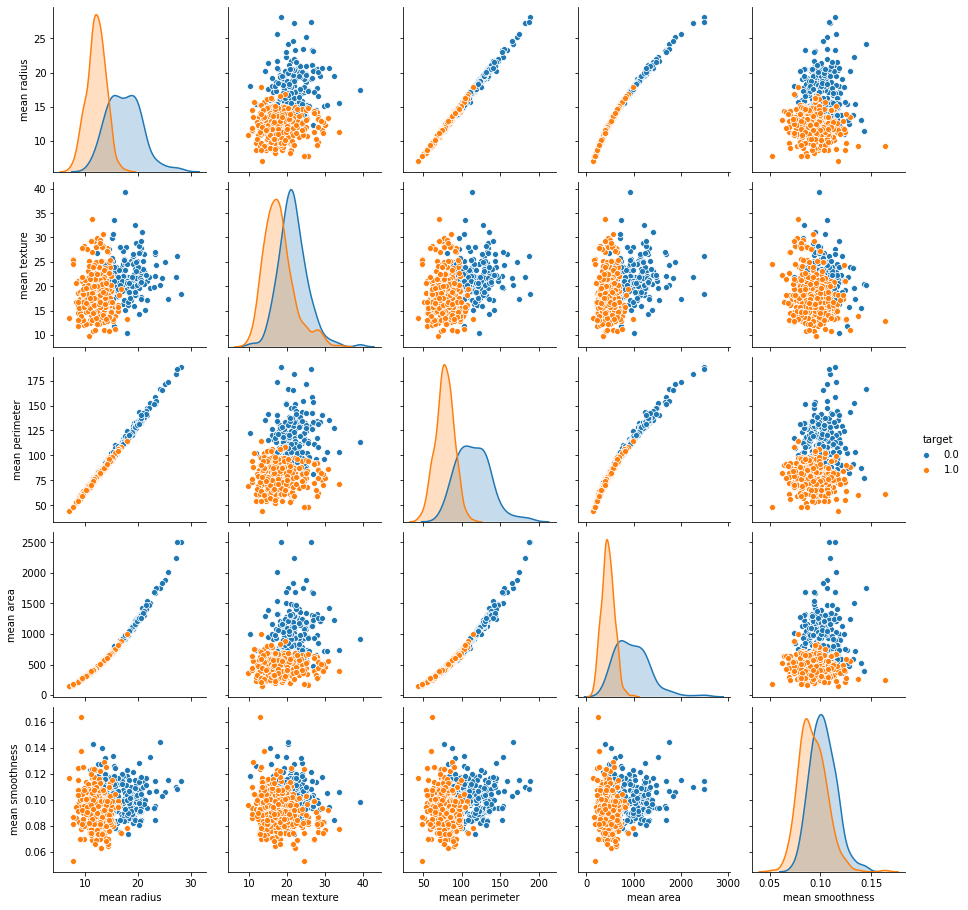

In [15]:
sns.pairplot(cancer_dataframe, hue = 'target', vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'] )

In [10]:
#FIND PAIRWISE CORRELATION OF ALL COLUMNS OF DATAFRAME
cancer_dataframe.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


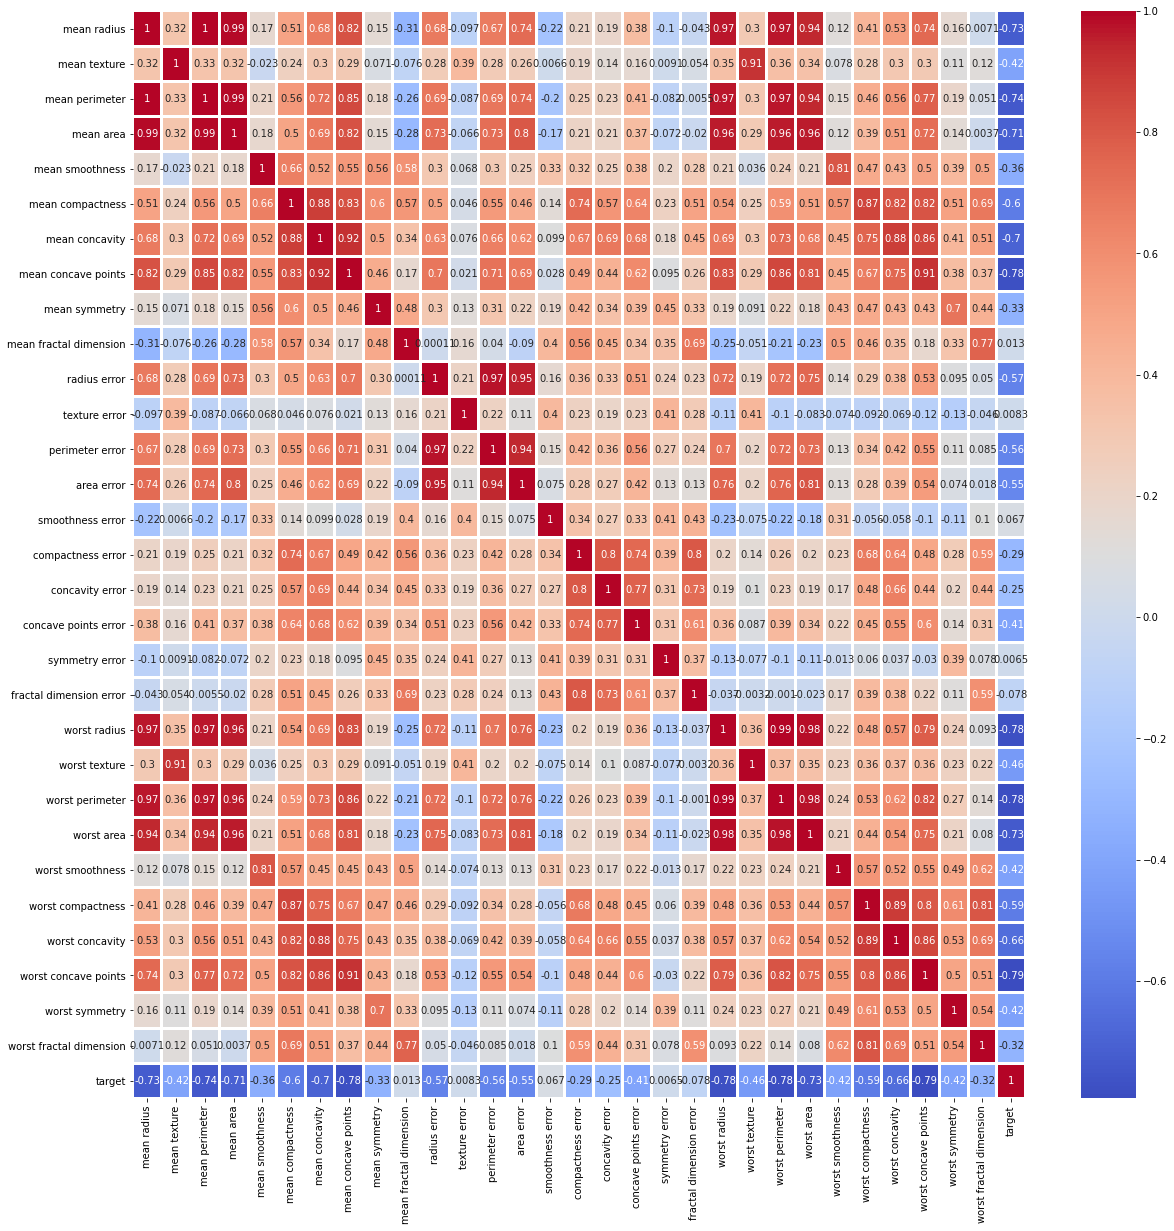

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(cancer_dataframe.corr(), annot = True, cmap ='coolwarm', linewidths=2)

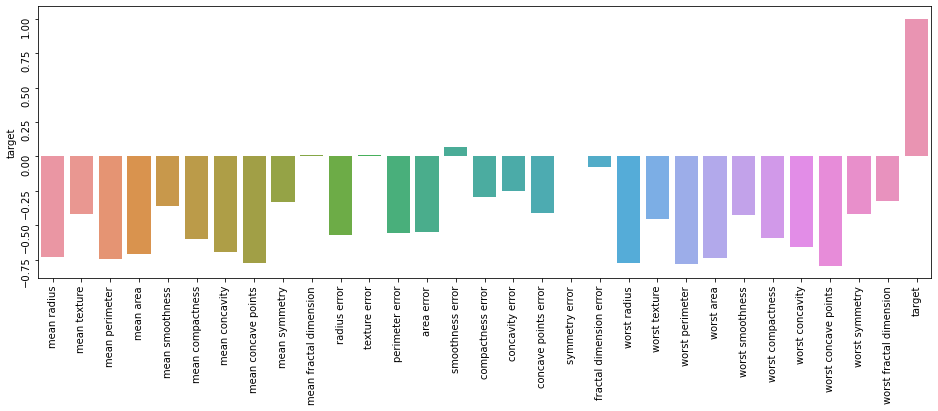

In [12]:
plt.figure(figsize = (16,5))
ax = sns.barplot(cancer_dataframe.corr()['target'].index , cancer_dataframe.corr()['target'])
ax.tick_params(labelrotation = 90)

## Preparing Data For Machine Learning Model

In [13]:
X= cancer_dataframe.drop(['target'],axis=1)
y = cancer_dataframe['target']

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size=0.2)

In [16]:
X_train.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

## Scaling the data

In [32]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## 1. Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train_sc,y_train)
y_pred = lr_model.predict(X_test_sc)
print("Test: ",accuracy_score(y_test,y_pred))
print("Train: ",accuracy_score(y_train,lr_model.predict(X_train_sc)))
print(classification_report(y_test,y_pred))

Test:  0.9736842105263158
Train:  0.9868131868131869
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        43
         1.0       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## 2. Support Vector Classifier

In [79]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train_sc,y_train)
y_pred = svm_model.predict(X_test_sc)
print("Test: ",accuracy_score(y_test,y_pred))
print("Train: ",accuracy_score(y_train,svm_model.predict(X_train_sc)))
print(classification_report(y_test,y_pred))

Test:  0.9824561403508771
Train:  0.989010989010989
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98        43
         1.0       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## 3. K-Nearest Neighbor Classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier
error=[]
for i in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train_sc,y_train)
    pred_y = knn_model.predict(X_test_sc)
    error.append(np.mean(pred_y != y_test))

Text(0, 0.5, 'Error')

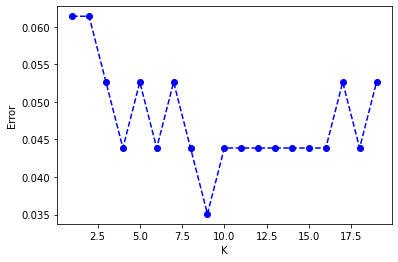

In [58]:
plt.plot(range(1,20),error,marker='o',color='blue',linestyle='dashed')
plt.xlabel("K")
plt.ylabel("Error")

So, we can try K=3,8,10 and further check which one is less sensitive to new data 

In [80]:
# K=3
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_sc,y_train)
y_pred = knn_model.predict(X_test_sc)
print("Test: ",accuracy_score(y_test,y_pred))
print("Train: ",accuracy_score(y_train,knn_model.predict(X_train_sc)))
print(classification_report(y_test,y_pred))

Test:  0.9473684210526315
Train:  0.9846153846153847
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        43
         1.0       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [81]:
# k=8
knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(X_train_sc,y_train)
y_pred = knn_model.predict(X_test_sc)
print("Test: ",accuracy_score(y_test,y_pred))
print("Train: ",accuracy_score(y_train,knn_model.predict(X_train_sc)))
print(classification_report(y_test,y_pred))

Test:  0.956140350877193
Train:  0.9758241758241758
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94        43
         1.0       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [82]:
# k=10
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train_sc,y_train)
y_pred = knn_model.predict(X_test_sc)
print("Test: ",accuracy_score(y_test,y_pred))
print("Train: ",accuracy_score(y_train,knn_model.predict(X_train_sc)))
print(classification_report(y_test,y_pred))

Test:  0.956140350877193
Train:  0.9736263736263736
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94        43
         1.0       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



As there is not much a difference b/w error values of K=3 , 8 , 10 but still at k=8 the varience b/w test and train accuracy is low thus it is neither an over nor under fitting

## Naive Bayes Classifier

In [83]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_sc, y_train)
y_pred = nb_model.predict(X_test_sc)

print("Test: ",accuracy_score(y_test,y_pred))
print("Train: ",accuracy_score(y_train,nb_model.predict(X_train_sc)))
print(classification_report(y_test,y_pred))

Test:  0.9649122807017544
Train:  0.9362637362637363
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95        43
         1.0       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion = 'entropy')
dt_classifier.fit(X_train_sc, y_train)
y_pred = dt_classifier.predict(X_test_sc)

print("Test: ",accuracy_score(y_test,y_pred))
print("Train: ",accuracy_score(y_train,dt_classifier.predict(X_train_sc)))
print(classification_report(y_test,y_pred))

Test:  0.9473684210526315
Train:  1.0
              precision    recall  f1-score   support

         0.0       0.97      0.88      0.93        43
         1.0       0.93      0.99      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [85]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_sc, y_train)
y_pred = xgb_classifier.predict(X_test_sc)

print("Test: ",accuracy_score(y_test,y_pred))
print("Train: ",accuracy_score(y_train,xgb_classifier.predict(X_train_sc)))
print(classification_report(y_test,y_pred))

Test:  0.956140350877193
Train:  1.0
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94        43
         1.0       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [86]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
}

In [87]:
from sklearn.model_selection import GridSearchCV 
grid_search = GridSearchCV(xgb_classifier, param_grid=params, scoring= 'roc_auc', n_jobs= -1, verbose= 3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 1512 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 2216 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 3048 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 4008 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done 5096 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 6312 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7656 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9128 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 10728 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 12456 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 14312 tasks     

GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree...om_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                                 

In [88]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [90]:
XG_grid=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [92]:
XG_grid.fit(X_train_sc,y_train)
y_pred = XG_grid.predict(X_test_sc)

print("Test: ",accuracy_score(y_test,y_pred))
print("Train: ",accuracy_score(y_train,XG_grid.predict(X_train_sc)))
print(classification_report(y_test,y_pred))

Test:  0.9649122807017544
Train:  1.0
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95        43
         1.0       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## Saving All the Models

In [94]:
import pickle

pickle.dump(lr_model,open("Model/logistic_model.pickle",'wb'))
pickle.dump(svm_model,open("Model/svm_model.pickle",'wb'))
pickle.dump(dt_classifier,open("Model/DecisionTree_model.pickle",'wb'))
pickle.dump(knn_model,open("Model/Knn_model.pickle",'wb'))
pickle.dump(nb_model,open("Model/nb_model.pickle",'wb'))
pickle.dump(XG_grid,open("Model/XG_boost.pickle",'wb'))

We could have tried more model or neural network but i think an average of 98% accuracy is good for the start.